In [1]:
import torch, torchvision
import os
import random
import logging #Se renseigner, par encore utilisé
import dataset

import constants as cst
import numpy as np
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

import loss_fn
from unet import UNET

In [2]:
TERM = "CH2"
EXTRA = "ALL"

DATASET = "/notebooks/images"
MASKS = "/notebooks/ch2"

Training set length: 78
Validation set length: 20
Testing set length: 19
Validation loss before training: 0.7872637152671814
Starting epoch 1. Trained: 0.26668504073750227. Validation: 0.5681127309799194.
Starting epoch 2. Trained: 0.004059471166692674. Validation: 0.03407575041055679.
Starting epoch 3. Trained: 0.0027539696544408797. Validation: 0.005672774463891983.
Starting epoch 4. Trained: 0.002668039553100243. Validation: 0.001949339732527733.
Starting epoch 5. Trained: 0.002331400051480159. Validation: 0.0019280043197795749.
Starting epoch 6. Trained: 0.0023599573352839796. Validation: 0.002479498460888863.
Starting epoch 7. Trained: 0.0021841824520379303. Validation: 0.002492991019971669.
Starting epoch 8. Trained: 0.0021202678442932667. Validation: 0.0018132667522877456.
Starting epoch 9. Trained: 0.0019706592021975665. Validation: 0.0016219541430473328.
Starting epoch 10. Trained: 0.0018058509100228547. Validation: 0.001520661567337811.
Starting epoch 11. Trained: 0.001804884

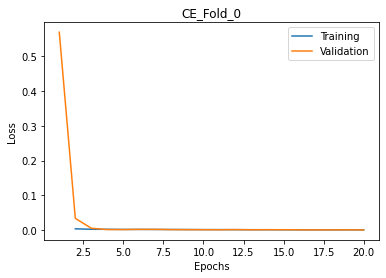

Training set length: 78
Validation set length: 20
Testing set length: 19
Validation loss before training: 0.7545589566230774
Starting epoch 1. Trained: 0.28676022003637625. Validation: 0.4429315745830536.
Starting epoch 2. Trained: 0.004866114666219801. Validation: 0.005953699629753828.
Starting epoch 3. Trained: 0.0027050203469116242. Validation: 0.004134858911857009.
Starting epoch 4. Trained: 0.003177861904259771. Validation: 0.0028682646807283163.
Starting epoch 5. Trained: 0.0025667033158242704. Validation: 0.0028502125293016433.
Starting epoch 6. Trained: 0.0022246647393330933. Validation: 0.002432454074732959.
Starting epoch 7. Trained: 0.001905811741016805. Validation: 0.00222854595631361.
Starting epoch 8. Trained: 0.0018205890664830804. Validation: 0.001953963772393763.
Starting epoch 9. Trained: 0.001716695970389992. Validation: 0.0018927574157714844.
Starting epoch 10. Trained: 0.001569312933133915. Validation: 0.0017788646277040244.
Starting epoch 11. Trained: 0.0017093257

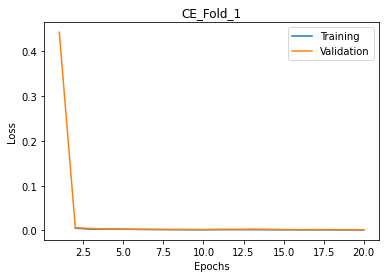

Training set length: 78
Validation set length: 20
Testing set length: 19
Validation loss before training: 0.6628487229347229
Starting epoch 1. Trained: 0.20462616599397734. Validation: 0.22273091971874237.
Starting epoch 2. Trained: 0.003416389657650143. Validation: 0.0029364684596657753.
Starting epoch 3. Trained: 0.002944379288237542. Validation: 0.0024018895346671343.
Starting epoch 4. Trained: 0.002708577096927911. Validation: 0.0023309670388698576.
Starting epoch 5. Trained: 0.00256183267920278. Validation: 0.0025137868709862233.
Starting epoch 6. Trained: 0.002206051314715296. Validation: 0.002091713878326118.
Starting epoch 7. Trained: 0.0020190452691167594. Validation: 0.0014983511297032236.
Starting epoch 8. Trained: 0.0021413879119791092. Validation: 0.0030093799345195294.
Starting epoch 9. Trained: 0.0024930888321250677. Validation: 0.0016348677454516292.
Starting epoch 10. Trained: 0.0017526950687170029. Validation: 0.0014159084064885973.
Starting epoch 11. Trained: 0.00165

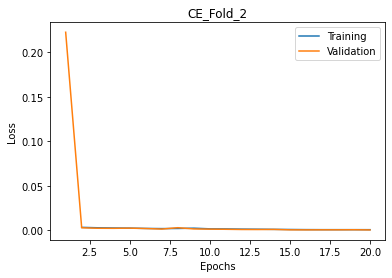

Training set length: 79
Validation set length: 19
Testing set length: 19
Validation loss before training: 0.7038211703300477
Starting epoch 1. Trained: 0.21308649028651416. Validation: 0.8929410338401794.
Starting epoch 2. Trained: 0.0034390243934467437. Validation: 0.00737132434733212.
Starting epoch 3. Trained: 0.0038147294137161223. Validation: 0.0026349655352532865.
Starting epoch 4. Trained: 0.002518661320209503. Validation: 0.0027344841044396164.
Starting epoch 5. Trained: 0.002615597064141184. Validation: 0.002336139092221856.
Starting epoch 6. Trained: 0.0020732474455144255. Validation: 0.002216868195682764.
Starting epoch 7. Trained: 0.0017359470075462013. Validation: 0.002323899301700294.
Starting epoch 8. Trained: 0.0015348403947427868. Validation: 0.0021276559215039014.
Starting epoch 9. Trained: 0.0015536938997684046. Validation: 0.00679960607085377.
Starting epoch 10. Trained: 0.001335254535661079. Validation: 0.003073919587768614.
Starting epoch 11. Trained: 0.0011548609

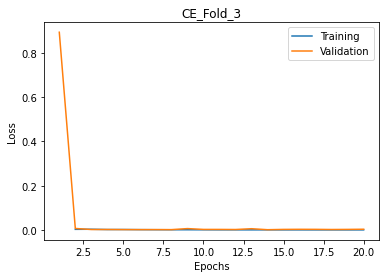

Training set length: 79
Validation set length: 19
Testing set length: 19
Validation loss before training: 0.7443768143653869
Starting epoch 1. Trained: 0.26245327898068355. Validation: 0.24943375885486602.
Starting epoch 2. Trained: 0.004439464118331671. Validation: 0.009853462688624859.
Starting epoch 3. Trained: 0.0034535698359832168. Validation: 0.004823589604347945.
Starting epoch 4. Trained: 0.0025814004766289145. Validation: 0.003704378800466657.
Starting epoch 5. Trained: 0.001969882857520133. Validation: 0.006343777314759791.
Starting epoch 6. Trained: 0.002707534714136273. Validation: 0.004693923937156797.
Starting epoch 7. Trained: 0.002301766455639154. Validation: 0.0038096968783065677.
Starting epoch 8. Trained: 0.0019030131807085127. Validation: 0.0064153570216149095.
Starting epoch 9. Trained: 0.0017256019753403961. Validation: 0.004951399564743042.
Starting epoch 10. Trained: 0.0015227601164951921. Validation: 0.0035704683046787976.
Starting epoch 11. Trained: 0.00134425

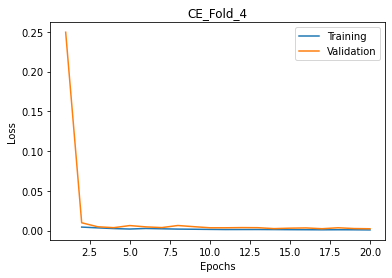

-------------------------
-----------END-----------
-------------------------
Best fold: 3
Best validation loss: 0.000530032953247428
Best epoch: 20
Mean val of folds: 0.0013849200843833388
Best vals for each fold:
Fold :1 - Val: 0.0009122480871155858
Fold :2 - Val: 0.0013484998722560703
Fold :3 - Val: 0.000530032953247428
Fold :4 - Val: 0.0017956746742129326
Fold :5 - Val: 0.0023381448350846767


In [3]:
random.seed(cst.SEED)
torch.manual_seed(cst.SEED)
np.random.seed(cst.SEED)

SIZE = (384, 512)

DEVICE_NAME = "cpu"
if torch.cuda.is_available():
    DEVICE_NAME = 'cuda:0'
DEVICE = torch.device(DEVICE_NAME)

transform = transforms.Compose([transforms.Resize(SIZE),
                                transforms.Pad((0, 64, 0, 64))])
untransform = transforms.Compose([transforms.CenterCrop(SIZE),
                                 transforms.Resize((1932, 2576))])

model = UNET(3, 2)
overall_best_model = UNET(3, 2)
overall_best_model = model
model.to(DEVICE)

best_fold = 0
overall_best = 10
best_fold_epoch = 0
fold_best_vals = []

image_folder = DATASET
mask_folder = MASKS


for fold in range(cst.FOLDS):
    # Datasets and loaders
    training_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                  mask_folder,
                                                  actual_fold=fold,
                                                  dataset="train",
                                                  folds=5)
    validation_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                    mask_folder,
                                                    actual_fold=fold,
                                                    dataset="validate",
                                                    folds=5)
    testing_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                 mask_folder,
                                                 actual_fold=fold,
                                                 dataset="test",
                                                 folds=5)

    training_loader = torch.utils.data.DataLoader(training_set,
                                                  batch_size=cst.BATCH_SIZE,
                                                  shuffle=True,
                                                  num_workers=cst.WORKERS)

    validation_loader = torch.utils.data.DataLoader(validation_set,
                                                    batch_size=cst.BATCH_SIZE,
                                                    shuffle=True,
                                                    num_workers=cst.WORKERS)

    testing_loader = torch.utils.data.DataLoader(testing_set,
                                                 batch_size=1,
                                                 shuffle=True,
                                                 num_workers=cst.WORKERS)

    # (Channels x Classes)
    model = UNET(3, 2)
    best_model = UNET(3, 2)
    best_model = model
    model.to(DEVICE)

    criterion = nn.CrossEntropyLoss()
    criterion_string = "CE"

    if cst.LOSS == "Dice":
        print("Dice")
        criterion = loss_fn.DiceLoss()
        criterion_string = "DCE"
    if cst.LOSS == "IOU":
        print("IOU")
        criterion = loss_fn.IoULoss()
        criterion_string = "IOU"
    if cst.LOSS == "Tversky":
        print("Twersky")
        criterion = loss_fn.TverskyLoss()
        criterion_string = "Tversky"

    optimiser = torch.optim.Adam(model.parameters(), lr=cst.LEARNING_RATE, weight_decay=cst.WEIGHT_DECAY)
    optimiser_string = "ADAM" + "_" + "LR" + str(cst.LEARNING_RATE) + "_" + "WD" + str(cst.WEIGHT_DECAY)

    if cst.OPTIMIZER == "SGD":
        optimizer = torch.optim.SGD(model.parameters(),
                                    lr=cst.LEARNING_RATE,
                                    momentum=cst.MOMENTUM,
                                    weight_decay=cst.WEIGHT_DECAY)
        optimiser_string = "SGD" + "_" + "LR" + str(cst.LEARNING_RATE) + "_" + "M" + str(cst.MOMENTUM)
        optimiser_string += "_" + "WD" + str(cst.WEIGHT_DECAY)

    model.eval()
    with torch.no_grad():
        val_loss = []
        for images, masks, names in validation_loader:
            images = transform(images)
            outputs = model(images.to(DEVICE))
            outputs = untransform(outputs)

            masks = masks.type(torch.LongTensor)
            masks = torch.squeeze(masks, 1)

            if cst.LOSS == "CE":
                vloss = criterion(outputs, masks.to(DEVICE))
            else:
                vloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

            loss = vloss.detach().item()
            val_loss.append(loss)

        loss = np.mean(val_loss)
        print("Validation loss before training: {}".format(loss))

    best_val = loss
    best_epoch = 0

    params_string = "Params" + "_" + "Epoch" + str(cst.EPOCHS) + "_" + "BS" + str(cst.BATCH_SIZE)
    params_string += "_" + "W" + str(cst.WORKERS)

    epochs_train_losses = []
    epochs_val_losses = []
    for i in range(cst.EPOCHS):
        print("Starting epoch {}".format(i+1), end=". ")

        model.train()
        train_loss = []
        for images, masks, names in training_loader:
            images = transform(images)
            outputs = model(images.to(DEVICE))
            outputs = untransform(outputs)

            masks = masks.type(torch.LongTensor)
            masks = torch.squeeze(masks, 1)

            if cst.LOSS == "CE":
                tloss = criterion(outputs, masks.to(DEVICE))
            else:
                tloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

            loss = tloss.detach().item()
            train_loss.append(loss)

            optimiser.zero_grad()
            tloss.backward()
            optimiser.step()

        #print("d")
        loss = np.mean(train_loss)
        epochs_train_losses.append(loss)
        print("Trained: {}".format(loss), end=". ")

        model.eval()
        with torch.no_grad():
            val_loss = []
            for images, masks, names in validation_loader:
                images = transform(images)
                outputs = model(images.to(DEVICE))
                outputs = untransform(outputs)

                masks = masks.type(torch.LongTensor)
                masks = torch.squeeze(masks, 1)

                if cst.LOSS == "CE":
                    vloss = criterion(outputs, masks.to(DEVICE))
                else:
                    vloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

                loss = vloss.detach().item()
                val_loss.append(loss)

            loss = np.mean(val_loss)
            epochs_val_losses.append(loss)
            print("Validation: {}.".format(loss))

            if loss < best_val:
                best_val = loss
                best_model = model
                best_epoch = i+1

    #print("Training: {}".format(epochs_train_losses))
    #print("Validating: {}".format(epochs_val_losses))
    print("Best score: {}".format(best_val))

    #model_filepath = os.path.join(cst.MODEL, model_name)
    #best_filepath = os.path.join(cst.MODEL, best_name)
    #torch.save(model.state_dict(), model_filepath)
    #torch.save(best_model.state_dict(), best_filepath)

    fold_best_vals.append(best_val)
    
    if best_val < overall_best:
        overall_best = best_val
        overall_best_model = best_model
        best_fold_epoch = best_epoch
        best_fold = fold

    print("--------------------")
    print("Fold: {}".format(fold))
    print("Last val: {}".format(loss))
    print("Best val: {}".format(best_val))
    print("--------------------")


    
    index = [i+1 for i in range(cst.EPOCHS)]
    plt.plot(index[1:], epochs_train_losses[1:], label="Training")
    plt.plot(index, epochs_val_losses, label="Validation")
    plt.title(str(cst.LOSS) + "_Fold_" + str(fold)) 
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    #plot_name = name + ".png"
    #plt.savefig(plot_name)
    

name = TERM + "_" + EXTRA + "_Fold" + str(best_fold) +  "_EPOCH" + str(best_fold_epoch) + "_Val" + str(best_val)
name = name + criterion_string + "_" + optimiser_string + "_" + params_string
model_name = name + ".pth"
best_filepath = os.path.join(cst.MODEL, model_name)
#torch.save(overall_best_model.state_dict(), best_filepath)

print("-------------------------")
print("-----------END-----------")
print("-------------------------")
print("Best fold: {}".format(best_fold+1))
print("Best validation loss: {}".format(overall_best))
print("Best epoch: {}".format(best_fold_epoch))
print("Mean val of folds: {}".format(np.mean(fold_best_vals)))
print("Best vals for each fold:")
a = 0
for item in fold_best_vals:
    print("Fold :{}".format(a+1), end=" - ")
    print("Val: {}".format(item))
    a=a+1

In [4]:
def predict_img(model, image, device, transform, out_threshold=0.5):
    with torch.no_grad():
        x = image
        logits = model(x.to(device))
        logits = transform(logits)
        y_pred = nn.Softmax(dim=1)(logits)
        proba = y_pred.detach().cpu().squeeze(0).numpy()[1, :, :]
        return proba > out_threshold

In [5]:
import metrics
tps = 0
precisions = []
recalls = []
F1s = []
IOUs = []

eval_model = UNET(3, 2)
eval_model = overall_best_model

eval_model.eval()
for image, mask, name in testing_loader:
    image_name = name[0]
    prediction = predict_img(model, transform(image), DEVICE, untransform, out_threshold=cst.THRESHOLD)
    pred = torch.from_numpy(prediction)
    
    precisions.append(metrics.precision(pred, mask))
    recalls.append(metrics.recall(pred, mask))
    F1s.append(metrics.F1Score(pred, mask))
    IOUs.append(metrics.IOUScore(pred, mask))
    
confidence = 0.9
print("Name of the run: {}".format(TERM + "_" + "Fold_" + str(best_fold)))
print("Precision: {}".format(np.mean(precisions)))
print("90% CI: {}".format(np.percentile(precisions, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(precisions), np.max(precisions))
print()

print("Recall: {}".format(np.mean(recalls)))
print("90% CI: {}".format(np.percentile(recalls, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(recalls), np.max(recalls))
print()
      
print("F1/Dice score: {}".format(np.mean(F1s)))
print("90% CI: {}".format(np.percentile(F1s, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(F1s), np.max(F1s))
print()

print("IoU: {}".format(np.mean(IOUs)))
print("90% CI: {}".format(np.percentile(IOUs, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(IOUs), np.max(IOUs))

Name of the run: CH2_Fold_2
Precision: 0.6280870009365881
90% CI: [0.1712858  0.95091912]
Min, max: 0.02657288003115837 0.9999999999933644

Recall: 0.5633168680388337
90% CI: [0.08529638 0.86643446]
Min, max: 0.07631405322173672 0.8693386773512252

F1/Dice score: 0.571767011162336
90% CI: [0.10167234 0.84242387]
Min, max: 0.040633403047383825 0.8608911476174672

IoU: 0.4371560702975722
90% CI: [0.05367658 0.7277977 ]
Min, max: 0.020738029887097477 0.7557584561096581
